# Fit the DDM on individual data

In [1]:
import rlssm
import pandas as pd
import os

## Import the data

In [2]:
par_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir, os.pardir))
data_path = os.path.join(par_path, 'data/data_experiment.csv')
data = pd.read_csv(data_path, index_col=0)

data = data[data.participant == 20].reset_index(drop=True) # Only select 1 participant

data.head()

,participant,block_label,trial_block,f_cor,f_inc,cor_option,inc_option,times_seen,rt,accuracy
0,20,1,1,46,46,4,2,1,2.574407,1
1,20,1,2,60,33,4,2,2,1.952774,1
2,20,1,3,32,44,2,1,2,2.074999,0
3,20,1,4,56,40,4,2,3,2.320916,0
4,20,1,5,34,32,2,1,3,1.471107,1


## Initialize the model

In [3]:
model = rlssm.DDModel(hierarchical_levels = 1)

Using cached StanModel


## Fit

In [5]:
# sampling parameters
n_iter = 1000
n_chains = 2
n_thin = 1

In [6]:
model_fit = model.fit(
    data,
    thin = n_thin,
    iter = n_iter,
    chains = n_chains,
    pointwise_waic=False,
    verbose = False)

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


Checks MCMC diagnostics:
n_eff / iter looks reasonable for all parameters
0.0 of 1000 iterations ended with a divergence (0.0%)
0 of 1000 iterations saturated the maximum tree depth of 10 (0.0%)
E-BFMI indicated no pathological behavior


### get Rhat

In [7]:
model_fit.rhat

,rhat,variable
0,0.999681,drift
1,1.001149,threshold
2,1.000719,ndt


### get wAIC

In [8]:
model_fit.waic

{'lppd': -224.5578184053441,
 'p_waic': 4.177738574454519,
 'waic': 457.47111395959723,
 'waic_se': 35.237582018474754}

## Posteriors

In [9]:
model_fit.samples.describe()

,chain,draw,transf_drift,transf_threshold,transf_ndt
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.50000,249.500000,0.943211,2.049441,0.916822
std,0.50025,144.409501,0.082096,0.070829,0.011551
min,0.00000,0.000000,0.692753,1.847843,0.880697
25%,0.00000,124.750000,0.888184,2.003003,0.910203
50%,0.50000,249.500000,0.939421,2.044975,0.918119
75%,1.00000,374.250000,0.999665,2.096679,0.924941
max,1.00000,499.000000,1.215091,2.310383,0.945661


In [10]:
import seaborn as sns
sns.set(context = "talk", 
        style = "white", 
        palette = "husl",
        rc={'figure.figsize':(15, 8)})

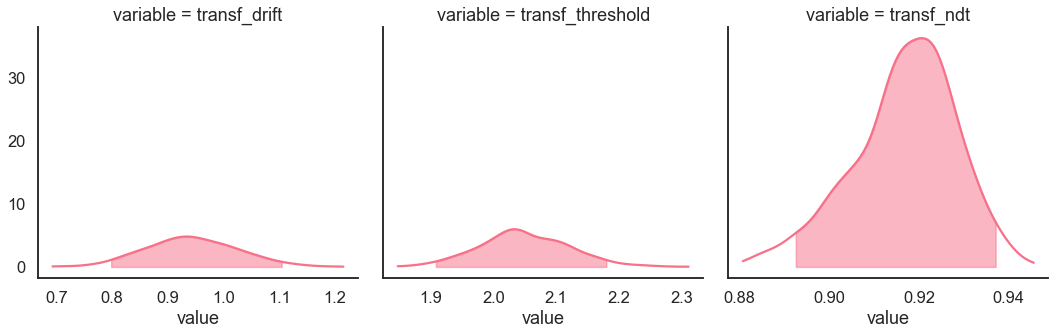

In [11]:
model_fit.plot_posteriors(height=5, show_intervals="HDI", alpha_intervals=.05);

## Posterior predictives

### Ungrouped

In [12]:
pp = model_fit.get_posterior_predictives_df(n_posterior_predictives=100)
pp

variable        rt                                                    \
trial          1         2         3         4         5         6     
sample                                                                 
1         2.299757  2.211757  2.302757  1.465757  1.211757  1.334757   
2         1.294609  2.575609  3.754609  1.639609  1.666609  1.415609   
3         1.073134  1.938134  1.393134  1.150134  1.213134  3.296134   
4         1.146232  1.500232  1.118232  1.306232  1.458232  1.644232   
5         1.870389  1.267389  1.153389  1.900389  1.047389  1.067389   
...            ...       ...       ...       ...       ...       ...   
96        1.164805  1.690805  1.840805  1.644805  1.925805  1.943805   
97        2.137362  2.259362  2.109362  1.486362  1.468362  3.125362   
98        1.231195  2.671195  1.421195  1.736195  1.256195  1.258195   
99        1.854844  1.346844  1.635844  2.013844  1.999844  1.478844   
100       1.101517  1.796517  2.195517  1.379517  1.046517  1.451517   

variable                                          ... accuracy                 \
trial          7         8         9         10   ...      231  232  233  234   
sample                                            ...                           
1         1.192757  1.533757  3.093757  2.062757  ...      1.0  0.0  1.0  1.0   
2         1.344609  2.511609  1.951609  1.496609  ...      1.0  0.0  1.0  1.0   
3         1.905134  1.630134  2.126134  1.501134  ...      1.0  1.0  1.0  1.0   
4         2.296232  1.551232  2.177232  1.090232  ...      1.0  1.0  0.0  1.0   
5         1.456389  1.359389  1.918389  1.836389  ...      1.0  1.0  1.0  1.0   
...            ...       ...       ...       ...  ...      ...  ...  ...  ...   
96        1.139805  2.907805  3.114805  1.234805  ...      1.0  1.0  1.0  0.0   
97        2.365362  2.327362  1.204362  2.244362  ...      1.0  1.0  0.0  1.0   
98        1.084195  2.842195  2.355195  3.060195  ...      1.0  1.0  1.0  1.0   
99        1.187844  1.218844  1.558844  1.078844  ...      1.0  1.0  1.0  1.0   
100       1.462517  1.216517  2.133517  2.851517  ...      1.0  0.0  1.0  1.0   

variable                                
trial     235  236  237  238  239  240  
sample                                  
1         1.0  1.0  1.0  1.0  1.0  0.0  
2         1.0  1.0  1.0  0.0  1.0  1.0  
3         1.0  1.0  1.0  0.0  1.0  1.0  
4         1.0  1.0  1.0  1.0  1.0  1.0  
5         1.0  1.0  1.0  1.0  1.0  1.0  
...       ...  ...  ...  ...  ...  ...  
96        1.0  1.0  1.0  1.0  1.0  1.0  
97        1.0  1.0  1.0  1.0  1.0  1.0  
98        1.0  1.0  1.0  1.0  1.0  1.0  
99        1.0  1.0  1.0  1.0  1.0  1.0  
100       0.0  1.0  1.0  0.0  0.0  1.0  

[100 rows x 480 columns]

In [13]:
pp_summary = model_fit.get_posterior_predictives_summary(n_posterior_predictives=100)
pp_summary

,mean_accuracy,mean_rt,skewness,quant_10_rt_low,quant_30_rt_low,quant_50_rt_low,quant_70_rt_low,quant_90_rt_low,quant_10_rt_up,quant_30_rt_up,quant_50_rt_up,quant_70_rt_up,quant_90_rt_up
sample,,,,,,,,,,,,,
1,0.862500,1.766261,1.598646,1.178757,1.360557,1.468757,1.711157,2.477957,1.149357,1.330157,1.577757,1.932957,2.699357
2,0.845833,1.809250,1.647380,1.154809,1.375009,1.622609,2.223409,3.395209,1.195809,1.352609,1.579609,1.906009,2.564609
3,0.908333,1.740988,1.333509,1.173834,1.362434,1.670134,2.327334,3.122034,1.139534,1.318534,1.526634,1.903834,2.493634
4,0.866667,1.775107,2.262707,1.098832,1.283032,1.559732,1.726832,2.593132,1.172332,1.358032,1.576232,1.859732,2.655532
5,0.854167,1.717939,2.378613,1.142989,1.285789,1.459389,1.688789,2.217789,1.139989,1.320389,1.558389,1.910389,2.484589
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.875000,1.707893,1.647229,1.226205,1.471205,1.693805,1.980505,2.332605,1.124805,1.301905,1.491805,1.860605,2.516805
97,0.912500,1.849358,2.560405,1.170362,1.327362,1.543362,1.663362,2.118362,1.190162,1.413962,1.657362,2.037562,2.815962
98,0.895833,1.709865,1.157768,1.107795,1.287795,1.445195,1.796995,2.052995,1.156595,1.326395,1.542195,1.897995,2.475795


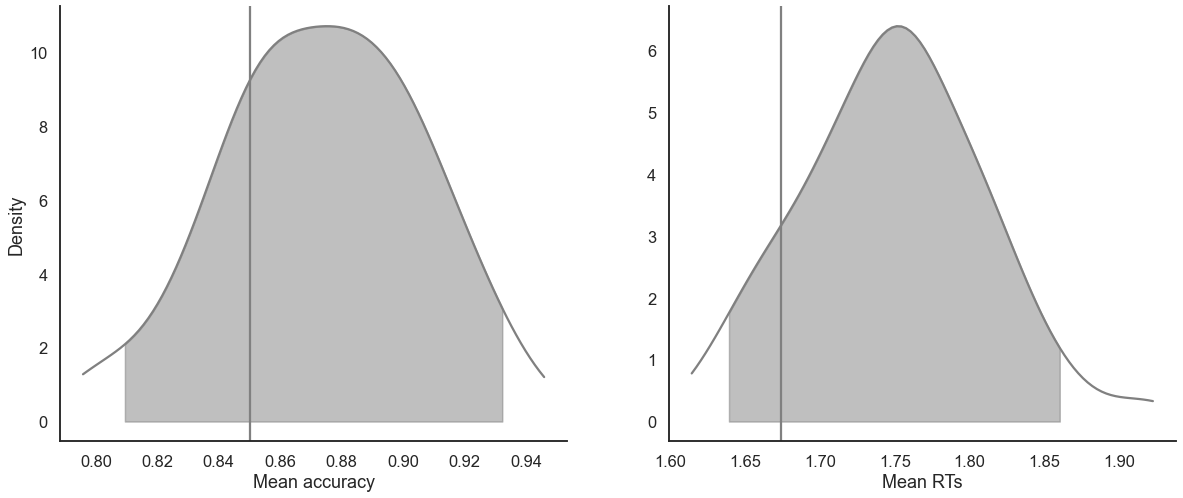

In [14]:
model_fit.plot_mean_posterior_predictives(n_posterior_predictives=100, figsize=(20,8), show_intervals='HDI');

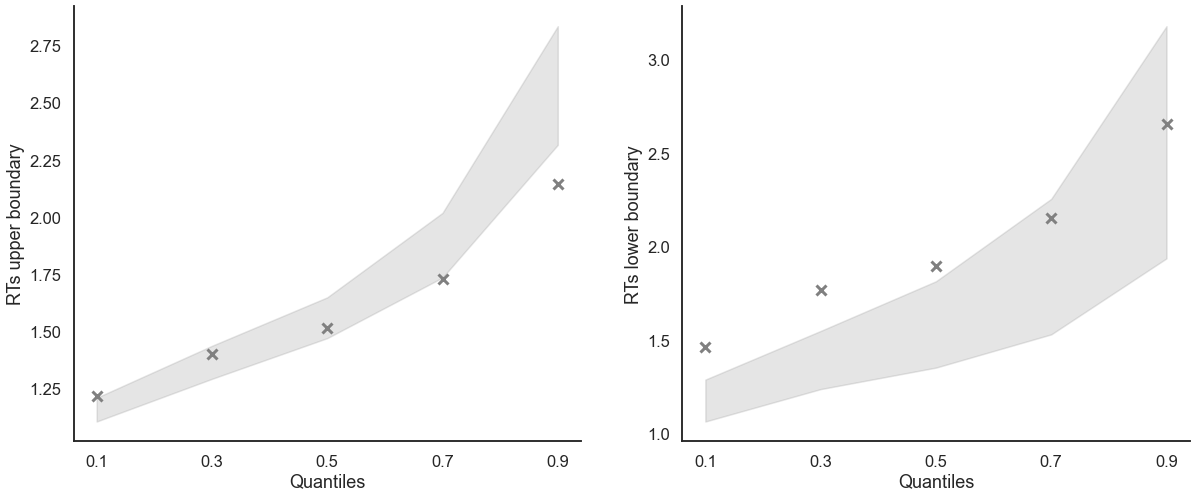

In [15]:
model_fit.plot_quantiles_posterior_predictives(n_posterior_predictives=100, kind='shades');

### Grouped

In [16]:
import numpy as np

In [17]:
# Define new grouping variables, in this case, for the different choice pairs, but any grouping var can do
data['choice_pair'] = 'AB'
data.loc[(data.cor_option == 3) & (data.inc_option == 1), 'choice_pair'] = 'AC'
data.loc[(data.cor_option == 4) & (data.inc_option == 2), 'choice_pair'] = 'BD'
data.loc[(data.cor_option == 4) & (data.inc_option == 3), 'choice_pair'] = 'CD'

data['block_bins'] = pd.cut(data.trial_block, 8, labels=np.arange(1, 9))

In [18]:
model_fit.get_grouped_posterior_predictives_summary(
                grouping_vars=['block_label', 'choice_pair'],
                quantiles=[.3, .5, .7],
                n_posterior_predictives=100)

mean_accuracy   mean_rt  skewness  \
block_label choice_pair sample                                      
1           AB          1                0.95  1.611457  1.160868   
                        2                0.80  1.559659  1.266961   
                        3                1.00  1.417684  0.859793   
                        4                0.90  1.510832  0.915726   
                        5                0.85  1.928039  0.374419   
...                                       ...       ...       ...   
3           CD          96               0.95  1.525355  1.177139   
                        97               0.85  1.829112  1.162953   
                        98               0.95  1.852995  2.741697   
                        99               0.90  1.857894  1.426069   
                        100              0.95  1.897717  1.688391   

                                quant_30_rt_low  quant_30_rt_up  \
block_label choice_pair sample                                    
1           AB          1              2.562757        1.230357   
                        2              1.325109        1.164609   
                        3                   NaN        1.251334   
                        4              1.208132        1.308232   
                        5              1.883389        1.462389   
...                                         ...             ...   
3           CD          96             1.182805        1.278805   
                        97             1.238362        1.629762   
                        98             1.459195        1.368195   
                        99             1.969444        1.349944   
                        100            3.800517        1.425717   

                                quant_50_rt_low  quant_50_rt_up  \
block_label choice_pair sample                                    
1           AB          1              2.562757        1.332757   
                        2              1.547609        1.310609   
                        3                   NaN        1.405634   
                        4              1.252732        1.516232   
                        5              2.097389        1.751389   
...                                         ...             ...   
3           CD          96             1.182805        1.473805   
                        97             1.244362        1.695362   
                        98             1.459195        1.512195   
                        99             2.353844        1.577344   
                        100            3.800517        1.493517   

                                quant_70_rt_low  quant_70_rt_up  
block_label choice_pair sample                                   
1           AB          1              2.562757        1.654157  
                        2              1.799709        1.738109  
                        3                   NaN        1.527534  
                        4              1.297332        1.698132  
                        5              2.354589        2.271989  
...                                         ...             ...  
3           CD          96             1.182805        1.752405  
                        97             1.374362        2.065562  
                        98             1.459195        1.935795  
                        99             2.738244        1.792044  
                        100            3.800517        1.889517  

[1200 rows x 9 columns]

In [19]:
model_fit.get_grouped_posterior_predictives_summary(
                grouping_vars=['block_bins'],
                quantiles=[.3, .5, .7],
                n_posterior_predictives=100)

mean_accuracy   mean_rt  skewness  quant_30_rt_low  \
block_bins sample                                                       
1          1            0.933333  1.912890  1.467054         1.615257   
           2            0.900000  1.814742  1.494203         1.636009   
           3            0.933333  1.842334  1.188122         1.407234   
           4            0.866667  1.674399  0.719589         1.266832   
           5            0.866667  1.868889  1.319899         3.342289   
...                          ...       ...       ...              ...   
8          96           0.933333  1.673805  2.435611         1.808405   
           97           0.833333  1.845129  1.442219         1.387562   
           98           0.833333  1.736628  1.399307         1.185395   
           99           0.933333  1.504977  2.619828         1.387944   
           100          0.833333  1.749350  1.547375         1.458517   

                   quant_30_rt_up  quant_50_rt_low  quant_50_rt_up  \
block_bins sample                                                    
1          1             1.581357         1.776257        1.793757   
           2             1.303609         1.857609        1.409609   
           3             1.305434         1.604634        1.665634   
           4             1.544232         1.364232        1.632232   
           5             1.307889         3.699389        1.381889   
...                           ...              ...             ...   
8          96            1.215805         1.890805        1.335305   
           97            1.257962         1.696362        1.592362   
           98            1.280995         1.282195        1.648195   
           99            1.263944         1.533344        1.458344   
           100           1.376117         1.490517        1.550517   

                   quant_70_rt_low  quant_70_rt_up  
block_bins sample                                   
1          1              1.937257        2.025657  
           2              2.224409        1.911609  
           3              1.802034        2.020434  
           4              1.496832        1.795232  
           5              3.840089        1.921889  
...                            ...             ...  
8          96             1.973205        1.585705  
           97             2.196362        2.013162  
           98             1.371795        2.010195  
           99             1.678744        1.510844  
           100            1.708917        1.978317  

[800 rows x 9 columns]

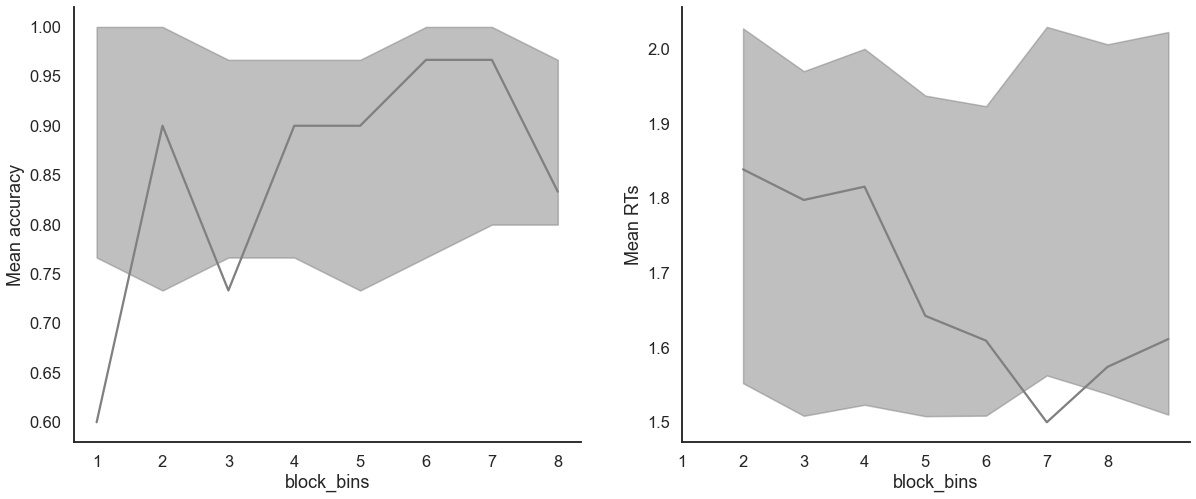

In [20]:
model_fit.plot_mean_grouped_posterior_predictives(grouping_vars=['block_bins'], 
                                                  n_posterior_predictives=100, 
                                                  figsize=(20,8));

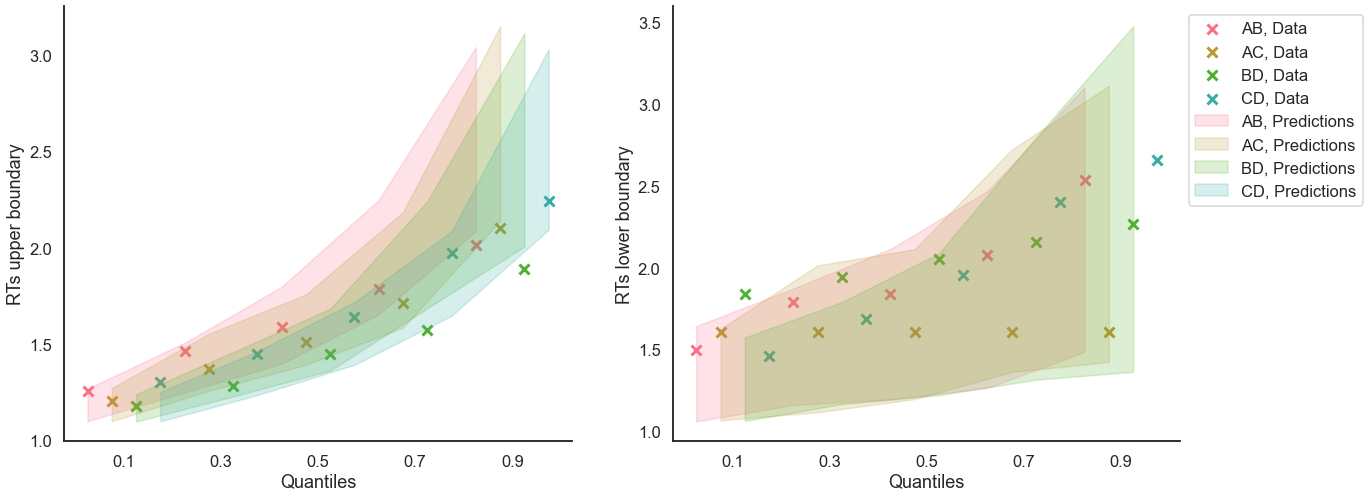

In [22]:
model_fit.plot_quantiles_grouped_posterior_predictives(
    n_posterior_predictives=100,
    grouping_var='choice_pair',
    kind='shades',
    quantiles=[.1, .3, .5, .7, .9]);